# Advance Regression

## House Prices Assignment

### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company is looking to prospective properties to enter into the market.

Essentially, the company wants —

- To identify the variables affecting house prices.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.


#### So interpretation is important!


## The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

In [1]:
# Import the necessary libararies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')
%matplotlib inline

# Set the no of columns to be displayed to 500
pd.set_option('display.max_columns', 500)

# Set the no of rows to be displayed to 200
pd.set_option('display.max_rows', 200)

#set scientific noations 9.8e+11 to 9888777777.1245
pd.options.display.float_format = '{:.4f}'.format


# Import Libararies specific to Machine Learning/Linear Regression

import sklearn
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score



In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
####################### Define Global Variables ##################################

# Assign the path of the local dir to a variable. 
#This path must be updated, if the notebook is being executed on a different machine.

Local_Dir = r"C:\DS_Learning\Data_Science_IITB\Machine_Learning\Advanced_Regression\Assignment"


# Store the name of the file in a variable. The file contanins the data about the house specification and their prices.
# The variable must be updated, if a different version of file being used


lfile = r"\train.csv"
House_Dataset = str(Local_Dir + lfile)

##  1. Reading and Understanding the Data

In [4]:
#Read the House dataset and load it into a Dataframe df
df = pd.read_csv(House_Dataset) 

In [5]:
# Get the basic information about the Dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Get the no of rows and columns
print('\t House Dataset has {} rows and {} columns ..'.format(df.shape[0],df.shape[1]))

	 House Dataset has 1460 rows and 81 columns ..


In [7]:
# Print the datatype of each column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Visualise The data

In [8]:
# Get the list of Numerical variables in a list
num_var = list(df.select_dtypes(include = ['float64', 'int64']).columns.values)

df_corr = df[num_var].corr().unstack()
# Print the correlations in the descending order
print(df_corr.sort_values(ascending = False))

SalePrice      SalePrice       1.0000
BsmtHalfBath   BsmtHalfBath    1.0000
HalfBath       HalfBath        1.0000
BedroomAbvGr   BedroomAbvGr    1.0000
KitchenAbvGr   KitchenAbvGr    1.0000
                                ...  
EnclosedPorch  YearBuilt      -0.3873
BsmtUnfSF      BsmtFullBath   -0.4229
BsmtFullBath   BsmtUnfSF      -0.4229
BsmtFinSF1     BsmtUnfSF      -0.4953
BsmtUnfSF      BsmtFinSF1     -0.4953
Length: 1444, dtype: float64


In [9]:
df[num_var].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0000,0.0112,-0.0106,-0.0332,-0.0284,0.0126,-0.0127,-0.0220,-0.0503,-0.0050,-0.0060,-0.0079,-0.0154,0.0105,0.0056,-0.0442,0.0083,0.0023,-0.0202,0.0056,0.0068,0.0377,0.0030,0.0272,-0.0198,0.0001,0.0166,0.0176,-0.0296,-0.0005,0.0029,-0.0466,0.0013,0.0570,-0.0062,0.0212,0.0007,-0.0219
MSSubClass,0.0112,1.0000,-0.3863,-0.1398,0.0326,-0.0593,0.0279,0.0406,0.0229,-0.0698,-0.0656,-0.1408,-0.2385,-0.2518,0.3079,0.0465,0.0749,0.0035,-0.0023,0.1316,0.1774,-0.0234,0.2817,0.0404,-0.0456,0.0851,-0.0401,-0.0987,-0.0126,-0.0061,-0.0120,-0.0438,-0.0260,0.0083,-0.0077,-0.0136,-0.0214,-0.0843
LotFrontage,-0.0106,-0.3863,1.0000,0.4261,0.2516,-0.0592,0.1233,0.0889,0.1935,0.2336,0.0499,0.1326,0.3921,0.4572,0.0802,0.0385,0.4028,0.1009,-0.0072,0.1988,0.0535,0.2632,-0.0061,0.3521,0.2666,0.0702,0.2857,0.3450,0.0885,0.1520,0.0107,0.0700,0.0414,0.2062,0.0034,0.0112,0.0074,0.3518
LotArea,-0.0332,-0.1398,0.4261,1.0000,0.1058,-0.0056,0.0142,0.0138,0.1042,0.2141,0.1112,-0.0026,0.2608,0.2995,0.0510,0.0048,0.2631,0.1582,0.0480,0.1260,0.0143,0.1197,-0.0178,0.1900,0.2714,-0.0249,0.1549,0.1804,0.1717,0.0848,-0.0183,0.0204,0.0432,0.0777,0.0381,0.0012,-0.0143,0.2638
OverallQual,-0.0284,0.0326,0.2516,0.1058,1.0000,-0.0919,0.5723,0.5507,0.4119,0.2397,-0.0591,0.3082,0.5378,0.4762,0.2955,-0.0304,0.5930,0.1111,-0.0402,0.5506,0.2735,0.1017,-0.1839,0.4275,0.3968,0.5478,0.6007,0.5620,0.2389,0.3088,-0.1139,0.0304,0.0649,0.0652,-0.0314,0.0708,-0.0273,0.7910
OverallCond,0.0126,-0.0593,-0.0592,-0.0056,-0.0919,1.0000,-0.3760,0.0737,-0.1281,-0.0462,0.0402,-0.1368,-0.1711,-0.1442,0.0289,0.0255,-0.0797,-0.0549,0.1178,-0.1941,-0.0608,0.0130,-0.0870,-0.0576,-0.0238,-0.3243,-0.1858,-0.1515,-0.0033,-0.0326,0.0704,0.0255,0.0548,-0.0020,0.0688,-0.0035,0.0439,-0.0779
YearBuilt,-0.0127,0.0279,0.1233,0.0142,0.5723,-0.3760,1.0000,0.5929,0.3157,0.2495,-0.0491,0.1490,0.3915,0.2820,0.0103,-0.1838,0.1990,0.1876,-0.0382,0.4683,0.2427,-0.0707,-0.1748,0.0956,0.1477,0.8257,0.5379,0.4790,0.2249,0.1887,-0.3873,0.0314,-0.0504,0.0049,-0.0344,0.0124,-0.0136,0.5229
YearRemodAdd,-0.0220,0.0406,0.0889,0.0138,0.5507,0.0737,0.5929,1.0000,0.1796,0.1285,-0.0678,0.1811,0.2911,0.2404,0.1400,-0.0624,0.2874,0.1195,-0.0123,0.4390,0.1833,-0.0406,-0.1496,0.1917,0.1126,0.6423,0.4206,0.3716,0.2057,0.2263,-0.1939,0.0453,-0.0387,0.0058,-0.0103,0.0215,0.0357,0.5071
MasVnrArea,-0.0503,0.0229,0.1935,0.1042,0.4119,-0.1281,0.3157,0.1796,1.0000,0.2647,-0.0723,0.1144,0.3639,0.3445,0.1746,-0.0691,0.3909,0.0853,0.0267,0.2768,0.2014,0.1028,-0.0376,0.2807,0.2491,0.2527,0.3642,0.3731,0.1597,0.1257,-0.1102,0.0188,0.0615,0.0117,-0.0298,-0.0060,-0.0082,0.4775
BsmtFinSF1,-0.0050,-0.0698,0.2336,0.2141,0.2397,-0.0462,0.2495,0.1285,0.2647,1.0000,-0.0501,-0.4953,0.5224,0.4459,-0.1371,-0.0645,0.2082,0.6492,0.0674,0.0585,0.0043,-0.1074,-0.0810,0.0443,0.2600,0.1535,0.2241,0.2970,0.2043,0.1118,-0.1023,0.0265,0.0620,0.1405,0.0036,-0.0157,0.0144,0.3864


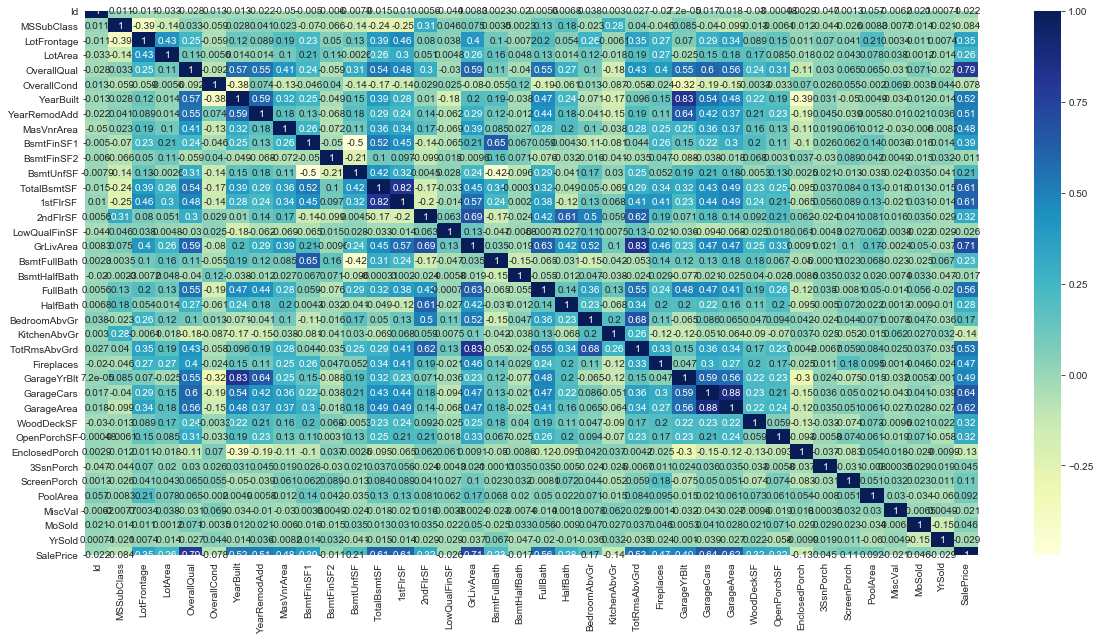

In [10]:
# Plot the graph for visual analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Observations
- Target Variable `SalePrice` seems to have high correlation with `OverallQual(0.79)`, `GrLiveArea(0.71)`, `GarageCars(0.64)`, `GarageArea(0.62)` etc
- Variable `TotalBsmtSF` has a significant high correlation with `TotalBsmtSF(0.82)` 
- Variable `GarageYrBlt` has a high correlation with `YearBuilt(0.78)`
- Varoable `GarageArea` has signficantly high correlation with `GarageCars(0.88)`

In [11]:
#Variables with the most correlation with the predictor variable
t_corr = df.corr()
print('Postive Correlation')
print('----------------------------')
print(t_corr['SalePrice'].sort_values(ascending = False).head())
print('\n')
print('Negative Correlation')
print('---------------------------')
print(t_corr['SalePrice'].sort_values().head())

Postive Correlation
----------------------------
SalePrice     1.0000
OverallQual   0.7910
GrLivArea     0.7086
GarageCars    0.6404
GarageArea    0.6234
Name: SalePrice, dtype: float64


Negative Correlation
---------------------------
KitchenAbvGr    -0.1359
EnclosedPorch   -0.1286
MSSubClass      -0.0843
OverallCond     -0.0779
YrSold          -0.0289
Name: SalePrice, dtype: float64


### Let's check the distibution of Target Variable `SalesPrice`

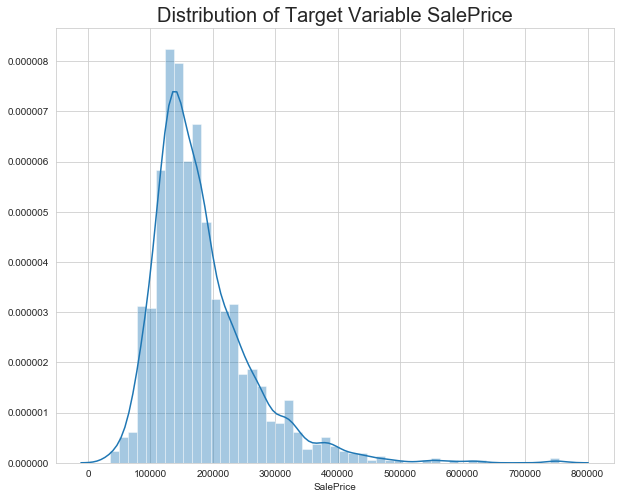

In [12]:
# Plot the graph for SalePrice
plt.figure(figsize = (10,8))
sns.distplot(df['SalePrice'])
plt.title('Distribution of Target Variable SalePrice', fontsize = 20)
plt.show()

### Target Variable `SalesPrice` is right skewed. But, We can use numpy log function to transform the data.

In [13]:
#Transform sale price to transform it into gaussian distribution
df['SalePrice'] = np.log1p(df['SalePrice'])

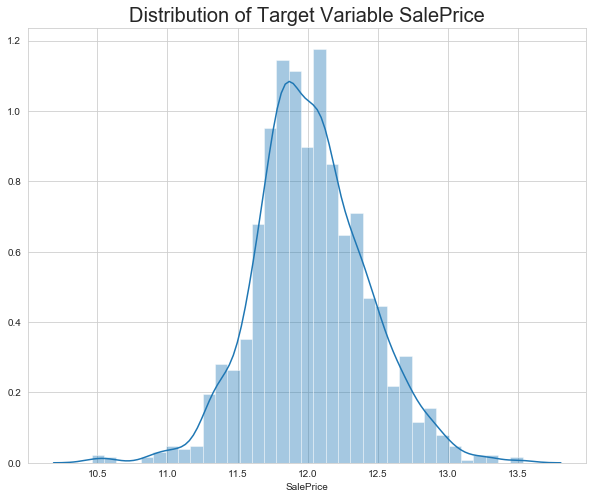

In [14]:
# Plot the graph for SalePrice
plt.figure(figsize = (10,8))
sns.distplot(df['SalePrice'])
plt.title('Distribution of Target Variable SalePrice', fontsize = 20)
plt.show()

***Lets plot the graph for the variable OverallQual, which has a high correlation with Target Variable***

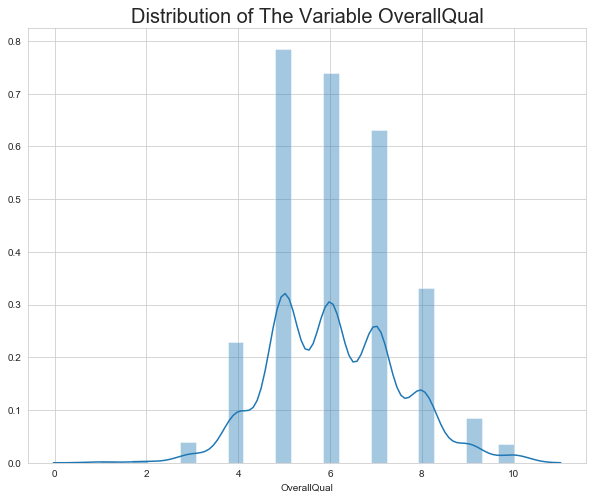

In [15]:
# Plot the graph for OverallQual
plt.figure(figsize = (10,8))
sns.distplot(df['OverallQual'])
plt.title('Distribution of The Variable OverallQual', fontsize = 20)
plt.show()

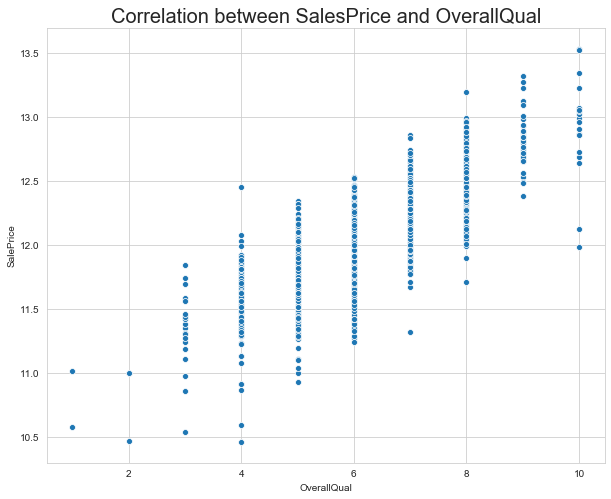

In [16]:
# Plot the relationshop between SalesPrice and OverallQual
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'OverallQual', y = 'SalePrice', data = df)
plt.title('Correlation between SalesPrice and OverallQual', fontsize = 20)
plt.show()

***Lets plot the graph for the variable GarageCars, which has a high correlation with Target Variable***

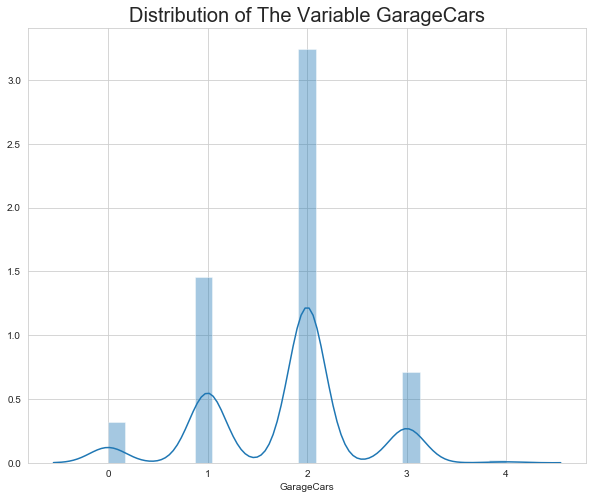

In [17]:
# Plot the graph for GarageCars
plt.figure(figsize = (10,8))
sns.distplot(df['GarageCars'])
plt.title('Distribution of The Variable GarageCars', fontsize = 20)
plt.show()

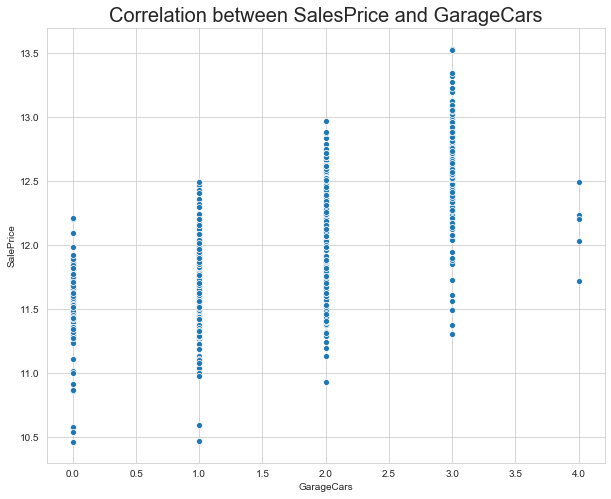

In [18]:
# Plot the relationshop between SalesPrice and GarageCars
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'GarageCars', y = 'SalePrice', data = df)
plt.title('Correlation between SalesPrice and GarageCars', fontsize = 20)
plt.show()

***Lets plot the graph for the variable GarageArea, which has a high correlation with Target Variable***

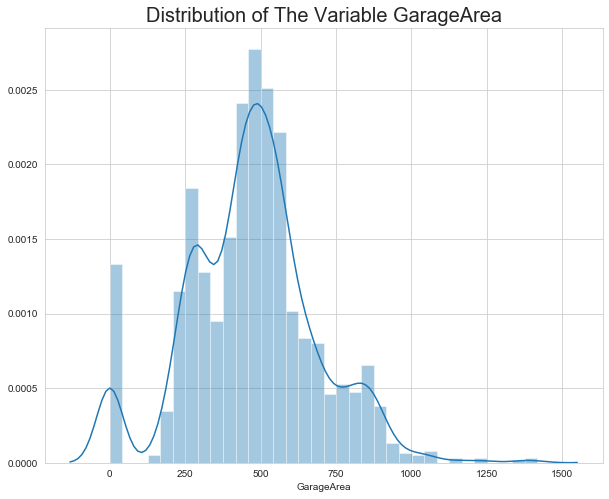

In [19]:
# Plot the graph for GarageArea
plt.figure(figsize = (10,8))
sns.distplot(df['GarageArea'])
plt.title('Distribution of The Variable GarageArea', fontsize = 20)
plt.show()

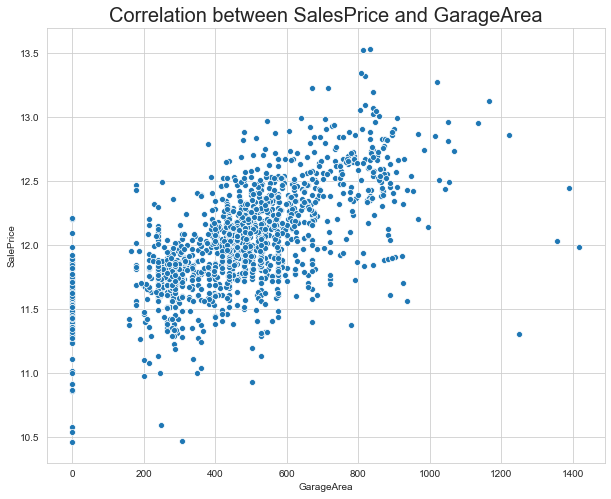

In [20]:
# Plot the relationshop between SalesPrice and GarageArea
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'GarageArea', y = 'SalePrice', data = df)
plt.title('Correlation between SalesPrice and GarageArea', fontsize = 20)
plt.show()

##  2. Data Cleaning

####  As per datadictionary, there are few categorical columns, that contain "Meaningless Value" such as "NA". Therefore, before, proceeding with NULL value check, let's replace "NA" with some arbitrary value(None) 

In [21]:
# Get the list of categorical in a list
cat_var = list(df.select_dtypes(include = 'object').columns.values)

In [22]:
# Create a function plt_catvar to plot graph for variables for univariate analysis
def plt_catvar(ldf, lvar, rot = 'Y'):
    plt.figure(figsize = (10,8))
    sns.countplot(x = lvar, data = ldf)
    l_title = 'Visual Analysis of the variable ' + lvar
    plt.title(l_title, fontsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [23]:
# Loop through each categorical column and print their distinct values 
for col in cat_var:
    print("\n")
    print(col)
    print(df[col].unique())



MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']


Street
['Pave' 'Grvl']


Alley
[nan 'Grvl' 'Pave']


LotShape
['Reg' 'IR1' 'IR2' 'IR3']


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']


Utilities
['AllPub' 'NoSeWa']


LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LandSlope
['Gtl' 'Mod' 'Sev']


Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']




### The following columns contain the value "NA
- `Alley` 
- `BsmtQual`
- `BsmtCond`
- `BsmtExposure`
- `BsmtFinType1`
- `BsmtFinType2`
- `FireplaceQu`
- `GarageType`
- `GarageFinish`
- `GarageCond`
- `GarageQual`
- `PoolQC`
- `Fence`
- `MiscFeature`

### Lets store these columns into a list and replace the NA/nan with "None" by looping through the list|

In [24]:
# Create a list
var_with_na = ['Alley'
, 'BsmtQual'
, 'BsmtCond'
, 'BsmtExposure'
, 'BsmtFinType1'
, 'BsmtFinType2'
, 'FireplaceQu'
, 'GarageType'
, 'GarageFinish'
, 'GarageCond'
, 'GarageQual'
, 'PoolQC'
, 'Fence'
, 'MiscFeature']

In [25]:
# Loop through each col in the list and replace NA(nan) with "None"
for col in var_with_na:
    df[col] = df[col].replace(np.nan, 'None')
    print("\n")
    print(col)
    print(df[col].unique())



Alley
['None' 'Grvl' 'Pave']


BsmtQual
['Gd' 'TA' 'Ex' 'None' 'Fa']


BsmtCond
['TA' 'Gd' 'None' 'Fa' 'Po']


BsmtExposure
['No' 'Gd' 'Mn' 'Av' 'None']


BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']


BsmtFinType2
['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']


FireplaceQu
['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types']


GarageFinish
['RFn' 'Unf' 'Fin' 'None']


GarageCond
['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']


GarageQual
['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']


PoolQC
['None' 'Ex' 'Fa' 'Gd']


Fence
['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


MiscFeature
['None' 'Shed' 'Gar2' 'Othr' 'TenC']


## Check For Missing Values
It seems, that are lots of columns that contains the missing values.
Let's verify the missing values percentage in each of them

In [26]:
# Get the no of missing values in each column
Null_Pcent = round((df.isnull().sum(axis = 0)/len(df.index)*100),2)
print(Null_Pcent)

Id               0.0000
MSSubClass       0.0000
MSZoning         0.0000
LotFrontage     17.7400
LotArea          0.0000
Street           0.0000
Alley            0.0000
LotShape         0.0000
LandContour      0.0000
Utilities        0.0000
LotConfig        0.0000
LandSlope        0.0000
Neighborhood     0.0000
Condition1       0.0000
Condition2       0.0000
BldgType         0.0000
HouseStyle       0.0000
OverallQual      0.0000
OverallCond      0.0000
YearBuilt        0.0000
YearRemodAdd     0.0000
RoofStyle        0.0000
RoofMatl         0.0000
Exterior1st      0.0000
Exterior2nd      0.0000
MasVnrType       0.5500
MasVnrArea       0.5500
ExterQual        0.0000
ExterCond        0.0000
Foundation       0.0000
BsmtQual         0.0000
BsmtCond         0.0000
BsmtExposure     0.0000
BsmtFinType1     0.0000
BsmtFinSF1       0.0000
BsmtFinType2     0.0000
BsmtFinSF2       0.0000
BsmtUnfSF        0.0000
TotalBsmtSF      0.0000
Heating          0.0000
HeatingQC        0.0000
CentralAir      

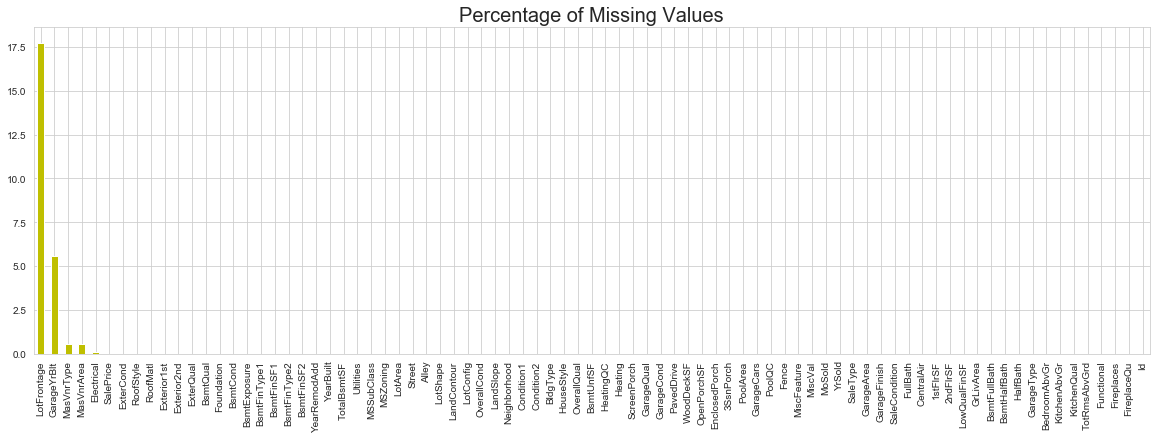

In [27]:
plt.figure(figsize=(20,6))
Null_Pcent.sort_values(ascending = False).plot(kind = 'bar', color = 'y')
plt.title('Percentage of Missing Values', fontsize = 20)
plt.show()

## Observations

- Column `LotFrontage` contains ~17.7% of missing values, which can be imputed
- Column `GarageYrBlt` contains ~5.5% of missing values
- There are few columns such as `MasVnrType`, `MasVnrArea` and `Electrical` that contain less than 1% of missing values 

#### Let's imput the variable `LotFrontage`

In [28]:
# Describe the column
df['LotFrontage'].describe()

count   1201.0000
mean      70.0500
std       24.2848
min       21.0000
25%       59.0000
50%       69.0000
75%       80.0000
max      313.0000
Name: LotFrontage, dtype: float64

### There seems to be outliers present in the column, so, it's better to replace missing values with Median

In [29]:
# Replace missing values in the column df['LotFrontage'] with median

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())

# verify the changes
df['LotFrontage'].isnull().sum()

0

### Let's impute the variable `GarageYrBlt`

In [30]:
# Describe the column
df['GarageYrBlt'].describe()

count   1379.0000
mean    1978.5062
std       24.6897
min     1900.0000
25%     1961.0000
50%     1980.0000
75%     2002.0000
max     2010.0000
Name: GarageYrBlt, dtype: float64

#### This column contains years, so, first let's convert the year to days

In [31]:
# Convert the years to days
df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x: (max(df['GarageYrBlt']) - x)*365)

In [32]:
df['GarageYrBlt'].head()

0    2555.0000
1   12410.0000
2    3285.0000
3    4380.0000
4    3650.0000
Name: GarageYrBlt, dtype: float64

Let's check if there is any outliers present in the column

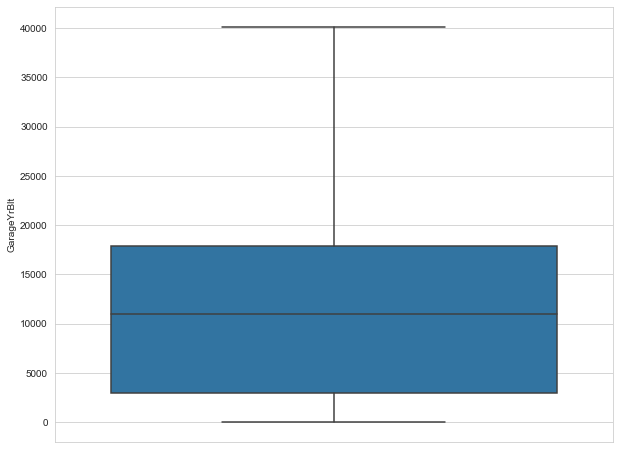

In [33]:
# Plt the Box plot for the variable GarageYrBlt
plt.figure(figsize = (10,8))
sns.boxplot(data = df, y = 'GarageYrBlt')
plt.show()

#### There seems to be  outlier present in the column, so it is safe to impute the missing values by "median"

In [34]:
# Check the count of the missing values
df['GarageYrBlt'].isnull().sum()

81

In [35]:
#Impute missing values by mean

df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan, df['GarageYrBlt'].median())


# Check the count again
df['GarageYrBlt'].isnull().sum()

0

#### For the rest of the columns, that contain less than 1% of missing values, let's drop the respective rows

In [36]:
# Drop the rows, where the value is missing as the Null Values percentage is less than 1
df.dropna(inplace = True)

## Check the columns again for missing values

In [37]:
# Get the missing values percentage of the columns
Null_Pcent = round((df.isnull().sum(axis = 0 )/len(df.index)*100),2)
print(Null_Pcent)

Id              0.0000
MSSubClass      0.0000
MSZoning        0.0000
LotFrontage     0.0000
LotArea         0.0000
Street          0.0000
Alley           0.0000
LotShape        0.0000
LandContour     0.0000
Utilities       0.0000
LotConfig       0.0000
LandSlope       0.0000
Neighborhood    0.0000
Condition1      0.0000
Condition2      0.0000
BldgType        0.0000
HouseStyle      0.0000
OverallQual     0.0000
OverallCond     0.0000
YearBuilt       0.0000
YearRemodAdd    0.0000
RoofStyle       0.0000
RoofMatl        0.0000
Exterior1st     0.0000
Exterior2nd     0.0000
MasVnrType      0.0000
MasVnrArea      0.0000
ExterQual       0.0000
ExterCond       0.0000
Foundation      0.0000
BsmtQual        0.0000
BsmtCond        0.0000
BsmtExposure    0.0000
BsmtFinType1    0.0000
BsmtFinSF1      0.0000
BsmtFinType2    0.0000
BsmtFinSF2      0.0000
BsmtUnfSF       0.0000
TotalBsmtSF     0.0000
Heating         0.0000
HeatingQC       0.0000
CentralAir      0.0000
Electrical      0.0000
1stFlrSF   

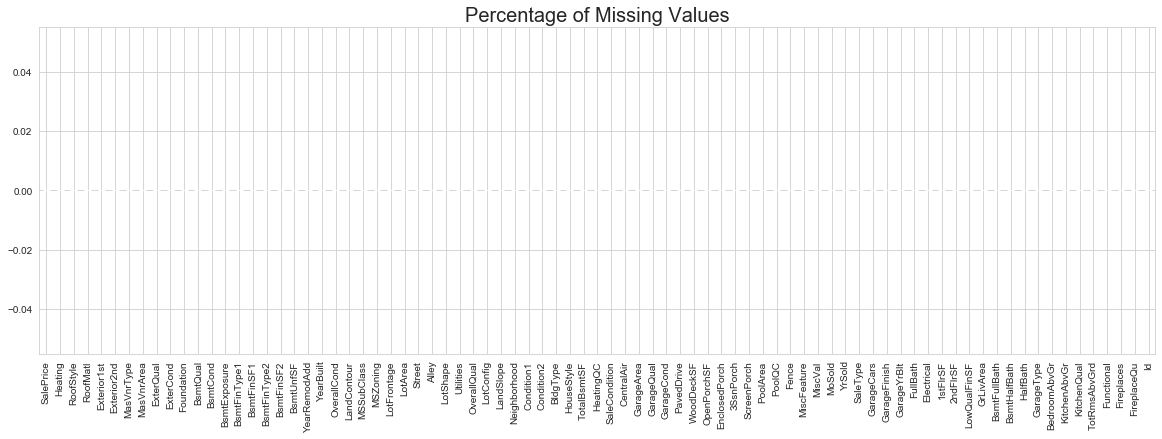

In [38]:
plt.figure(figsize=(20,6))
Null_Pcent.sort_values(ascending = False).plot(kind = 'bar', color = 'y')
plt.title('Percentage of Missing Values', fontsize = 20)
plt.show()

## Now all the columns have been imputed

## Check, if any of the columns has only one unique value

In [39]:
print('These Columns have only one Unique Value ..')
print("\n")
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)

These Columns have only one Unique Value ..




#### There is no column, which has only a single value

### Check for any blank rows

In [40]:
df[df.isnull().all(axis = 1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### There is no blank row, present in the dataset

In [41]:
# Create a function plt_catvar to plot graph for variables for univariate analysis
def plt_catvar(ldf, lvar, rot = 'Y'):
    plt.figure(figsize = (10,8))
    sns.countplot(x = lvar, data = ldf)
    l_title = 'Visual Analysis of the variable ' + lvar
    plt.title(l_title, fontsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

## Varaince Analysis of some of the categorical columns 

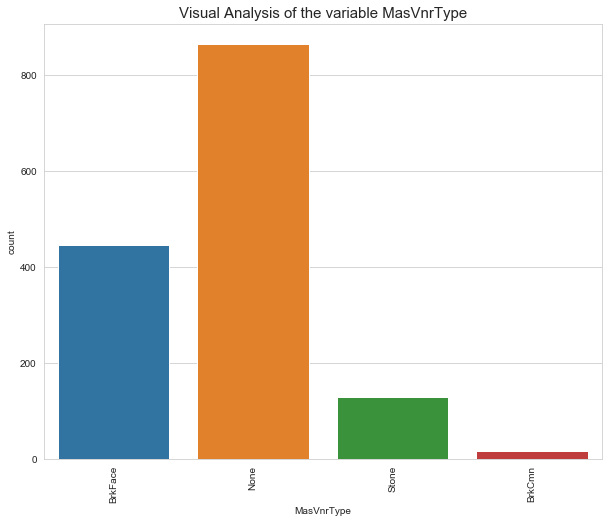

In [42]:
# Plot the graph for the variable MasVnrType
plt_catvar(df, 'MasVnrType')

It seems more than 50% of rows have the value "None". Also, looking into the data dictionary, the column is not that much relevant. Hence, lets drop it

In [43]:
# Drop the column MasVnrType
df = df.drop('MasVnrType', 1)

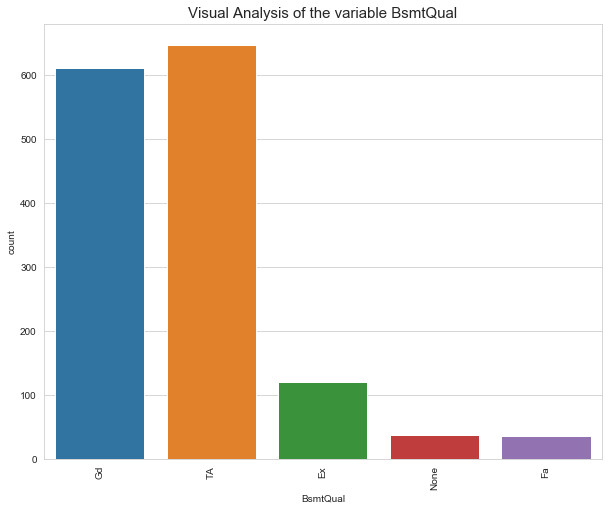

In [44]:
# Plot the graph for the variable BsmtQual
plt_catvar(df, 'BsmtQual')

We can combine "Ex", "None", and "FA" with "TA" to maintain the balance in the column

In [45]:
# Replace the null values with "TA"
df['BsmtQual'] = df['BsmtQual'].replace('None', 'TA')
df['BsmtQual'] = df['BsmtQual'].replace('Ex', 'TA')
df['BsmtQual'] = df['BsmtQual'].replace('Fa', 'TA')



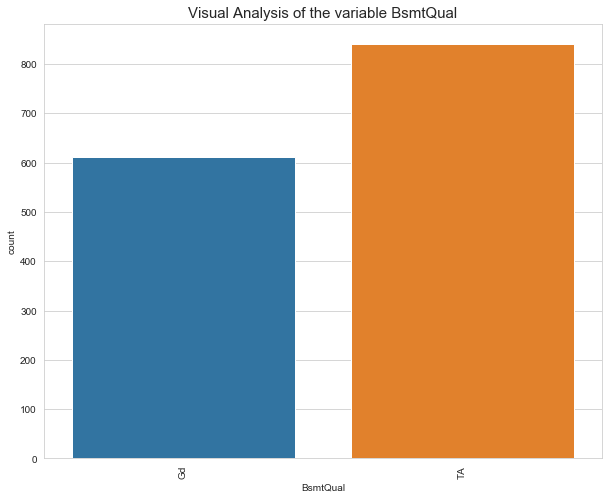

In [46]:
# Plot the graph again for the variable BsmtQual
plt_catvar(df, 'BsmtQual')

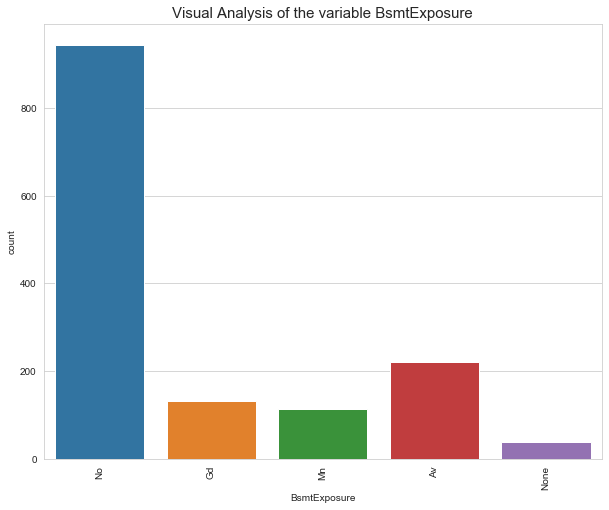

In [47]:
# Plot the graph for the variable BsmtExposure
plt_catvar(df, 'BsmtExposure')

We can combine "Gd", "None", "mn" with "Av" to maintain the balance in the column

In [48]:
# Replc Gd", "None", "mn" with "Av" 
df['BsmtExposure'] = df['BsmtExposure'].replace('Gd', 'Other')
df['BsmtExposure'] = df['BsmtExposure'].replace('None', 'Other')
df['BsmtExposure'] = df['BsmtExposure'].replace('Mn', 'Other')


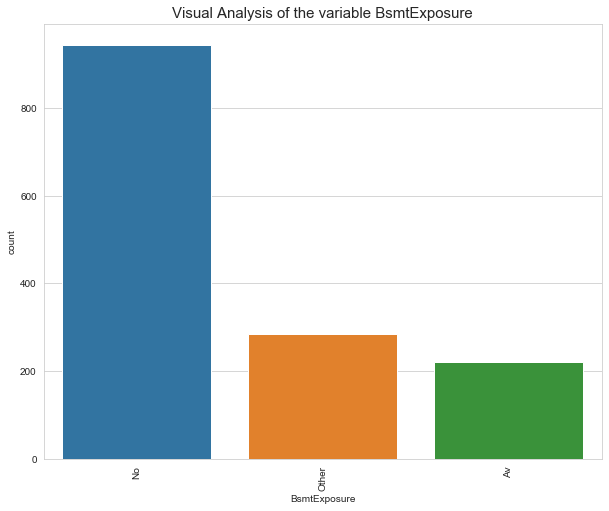

In [49]:
# Plot the graph for the variable BsmtExposure
plt_catvar(df, 'BsmtExposure')

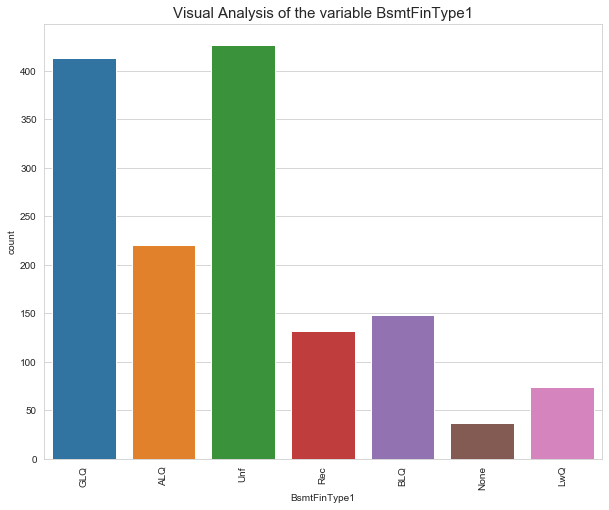

In [50]:
# Plot the graph for the variable BsmtQual
plt_catvar(df, 'BsmtFinType1')

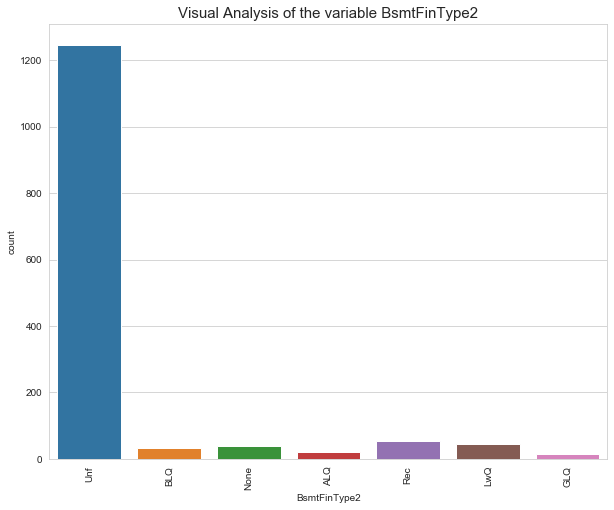

In [51]:
# Plot the graph for the variable BsmtQual
plt_catvar(df, 'BsmtFinType2')

The imbalance in data is very high and there does not seem any variance, let's drop this column

In [52]:
df = df.drop('BsmtFinType2', 1)

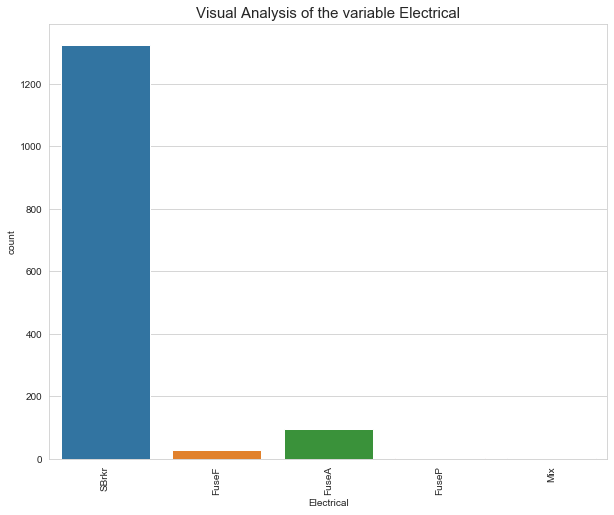

In [53]:
# Plot the graph for the variable Electrical
plt_catvar(df, 'Electrical')

The imbalance in data is very high and there does not seem any variance, let's drop this column

In [54]:
df = df.drop('Electrical', 1)

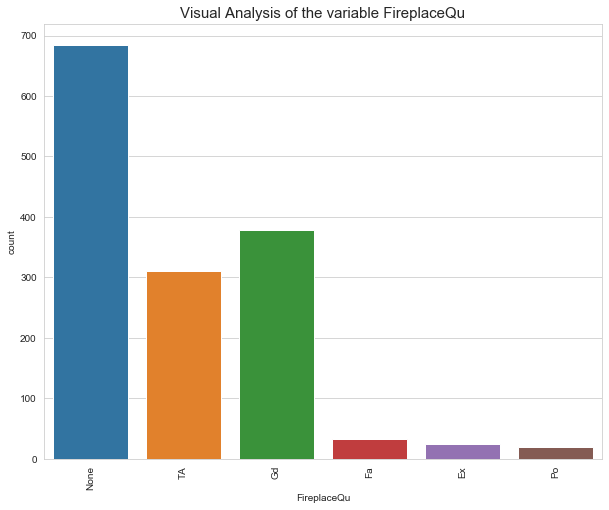

In [55]:
# Plot the graph for the variable FireplaceQu
plt_catvar(df, 'FireplaceQu')

We can create another category called "Other" for "Fa", "Ex", "Po"

In [56]:
# Replace values with low balance with category other
llist = ['Fa', 'Ex', 'Po']
df['FireplaceQu'] = df['FireplaceQu'].apply(lambda x: 'Other' if x in llist else x)

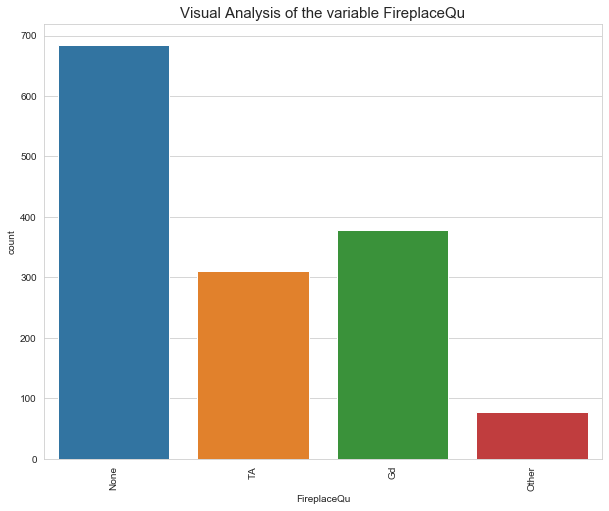

In [57]:
# Plot the graph for the variable FireplaceQu
plt_catvar(df, 'FireplaceQu')

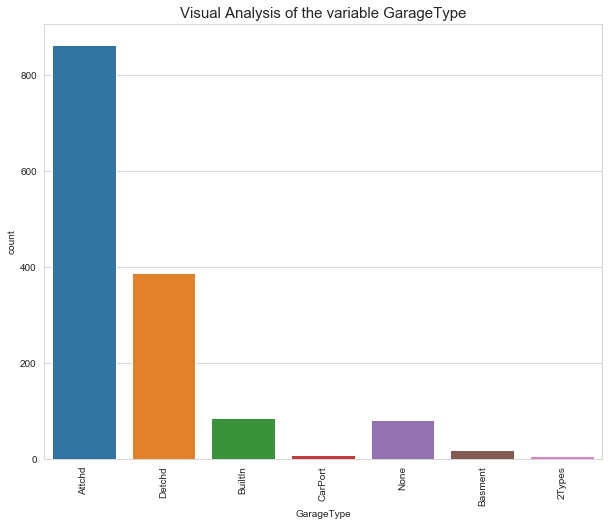

In [58]:
# Plot the graph for the variable GarageType
plt_catvar(df, 'GarageType')

We can create another category called "Other" for "Builtin", "CarPort", "None", "Basement", "2Types"

In [59]:
# Replace values with low balance with category other
llist = ["BuiltIn", "CarPort", "None", "Basment", "2Types"]
df['GarageType'] = df['GarageType'].apply(lambda x: 'Other' if x in llist else x)

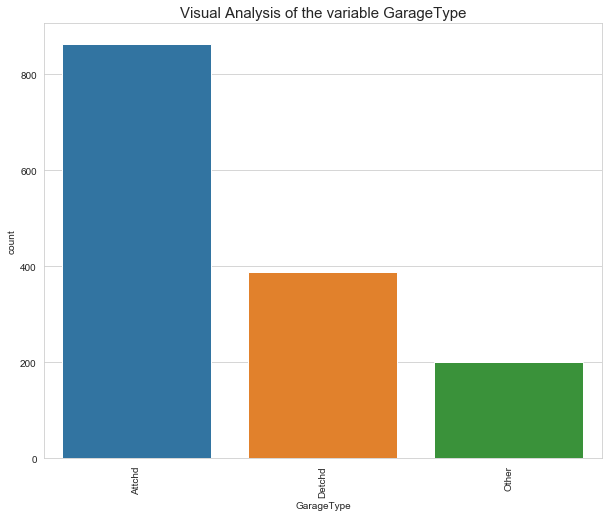

In [60]:
# Plot the graph for the variable GarageType
plt_catvar(df, 'GarageType')

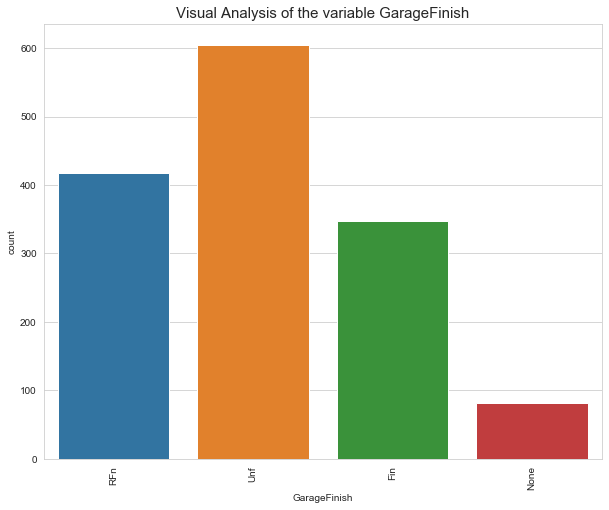

In [61]:
# Plot the graph for the variable GarageFinish
plt_catvar(df, 'GarageFinish')

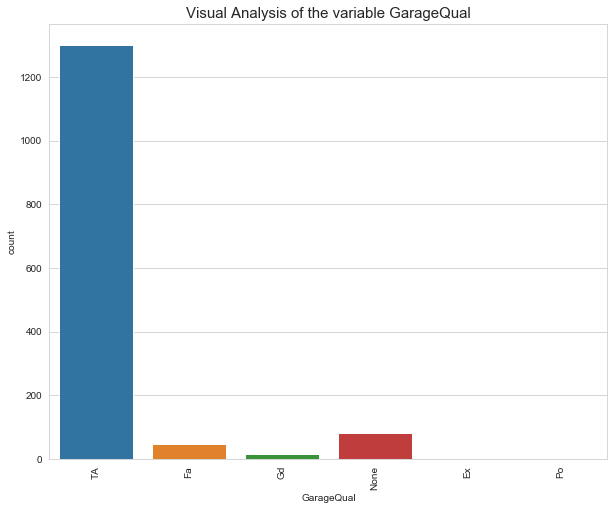

In [62]:
# Plot the graph for the variable GarageQual
plt_catvar(df, 'GarageQual')

This is a highly skewed column, let's drop it.

In [63]:
# Drop the column GarageQual, due to skewneess in the data
df = df.drop('GarageQual', 1)

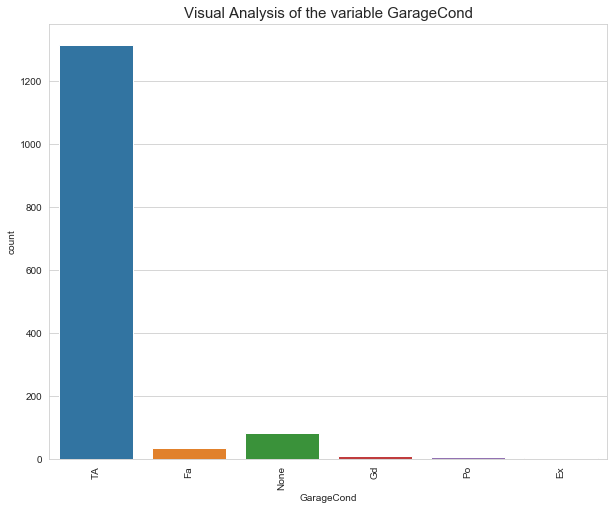

In [64]:
# Plot the graph for the variable GarageCond
plt_catvar(df, 'GarageCond')

`GarageCond` is a highly skewed column, let's drop it

In [65]:
#Drop the column GarageCond, due to skewneess in the data
df = df.drop('GarageCond', 1)

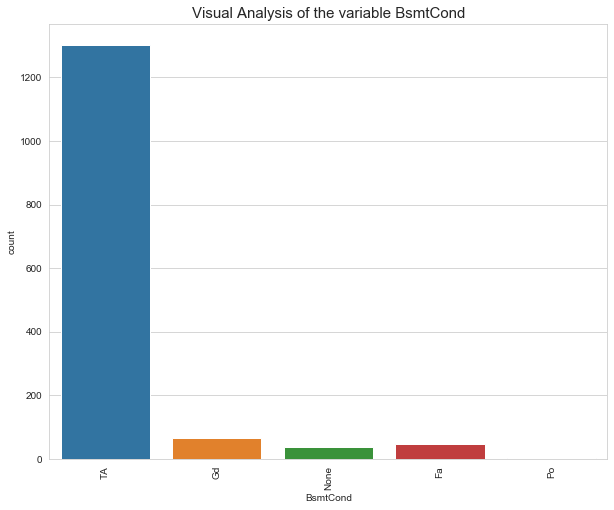

In [66]:
# Plot the graph for the variable GarageQual
plt_catvar(df, 'BsmtCond')

`BsmtCond` is a highly skewed column, let's drop it

In [67]:
#Drop the column BsmtCond, due to skewneess in the data
df = df.drop('BsmtCond', 1)

## Varaince Analysis of some of the Numerical columns 

In [68]:
# Create a function to plot Numeric Variables for Univariate Anaysis
def plt_numvar(lvar):
    plt.figure(figsize = (10,8))
    plt.title("Distribution Plot for " + lvar, fontsize  =15)
    sns.distplot(df[lvar])
    plt.show()

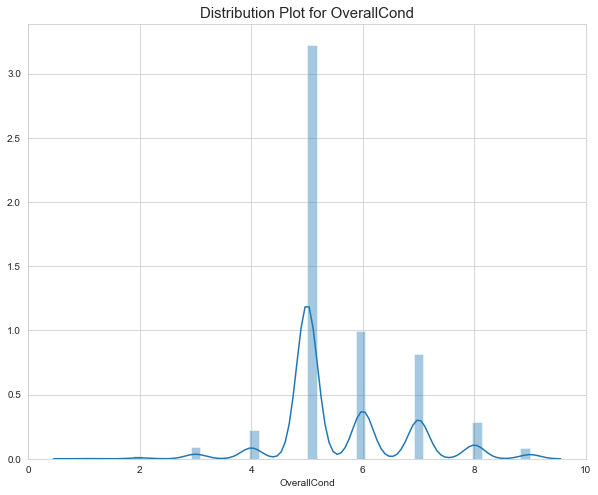

In [69]:
# Plot the variable OverallCond
plt_numvar('OverallCond')

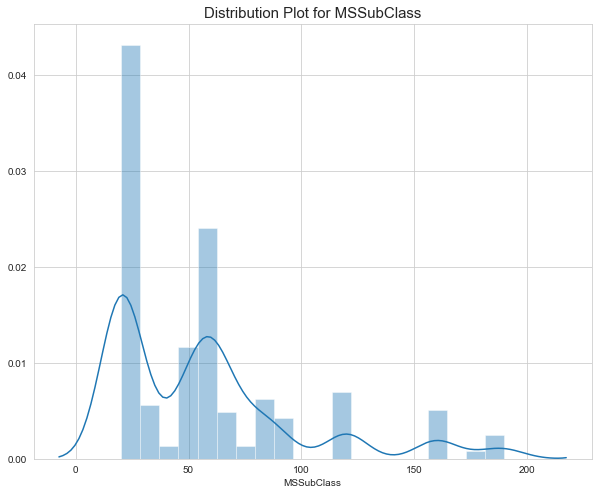

In [70]:
# Plot the variable OverallCond
plt_numvar('MSSubClass')

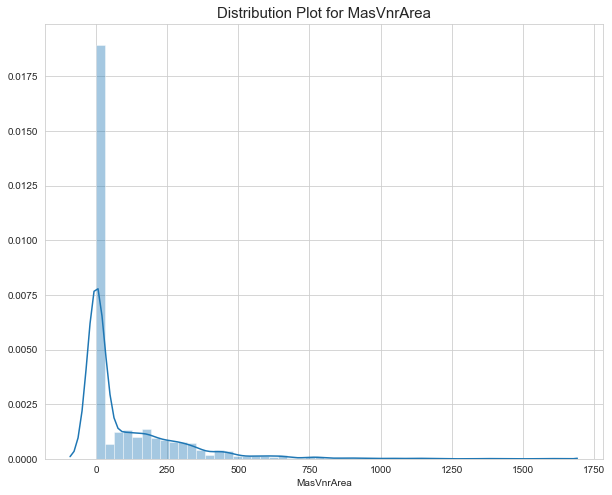

In [71]:
# Plot the variable OverallCond
plt_numvar('MasVnrArea')

This columns is highly left skewed, lets drop it.

In [72]:
# Drop the column MasVnrArea, due to skewness
df = df.drop('MasVnrArea', 1)

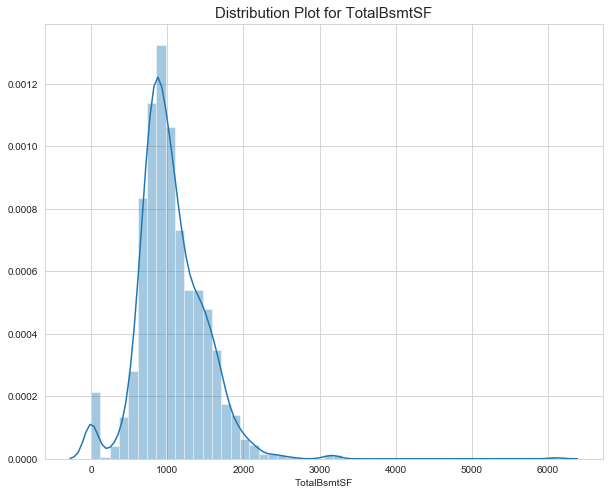

In [73]:
# Plot the variable TotalBsmtSF
plt_numvar('TotalBsmtSF')

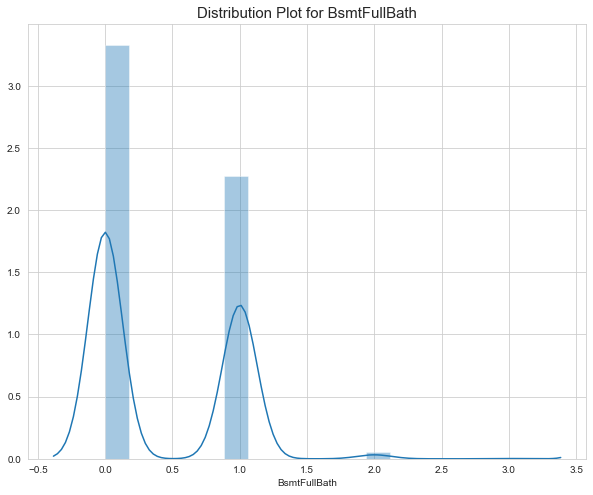

In [74]:
# Plot the variable OverallCond
plt_numvar('BsmtFullBath')

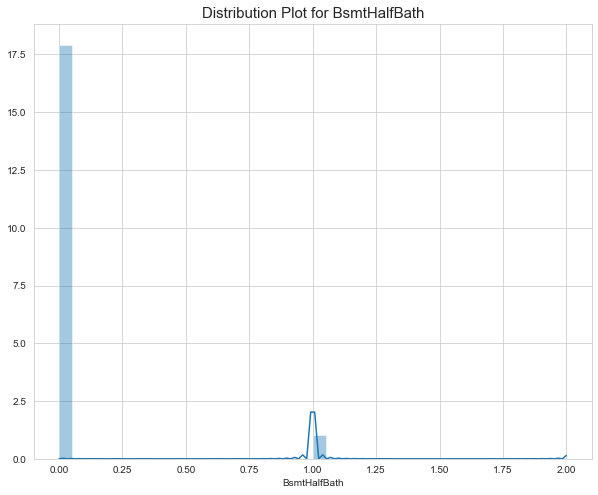

In [75]:
# Plot the variable OverallCond
plt_numvar('BsmtHalfBath')

In [76]:
# Drop the column Id, which is a system generated key and does not have any business meaning
df  = df.drop('Id', 1)

In [77]:
# Get the list of Numerical variables in a list
num_var = list(df.select_dtypes(include = ['float64', 'int64']).columns.values)

##  3. Data Preparation

#### As per the Data Dictionary, there are following columns, which are having calender year as values, these variables need to be converted to something meaning like age/no of days
- `GarageYrBlt`
- `YrSold`
- `YearBuilt`
- `YearRemodAdd`

Let's convert these

In [78]:
# Convert the year columns to no of days, by substracting it from the Max value of the column
llist = ['YrSold', 'YearBuilt', 'YearRemodAdd']
for col in llist:
    df[col] = df[col].apply(lambda x: 365*(max(df[col]) - x)) # multiple by 365 to convert year into days

### Check the skewness in each numerical variable, and if it's greater than 0.5 or less than -0.5, let's convert that variable to log

In [79]:
for col in num_var:
    if col == 'SalePrice': # SalesPrice has already been taken care of
        continue
    else:
        if df[col].skew() < -0.5 or df[col].skew() > 0.5: ## if skewness < -0.5 or 0.5
            print('\n')
            print(col)
            print('Before log conversion \t=> ' + str(df[col].skew()))
            df[col] = np.log1p(df[col])
            print('After log conversion \t=> ' + str(df[col].skew()))



MSSubClass
Before log conversion 	=> 1.4082992540425745
After log conversion 	=> 0.24975168309211213


LotFrontage
Before log conversion 	=> 2.4194663138886234
After log conversion 	=> -0.8690595383555826


LotArea
Before log conversion 	=> 12.235741743336332
After log conversion 	=> -0.1424512540493921


OverallCond
Before log conversion 	=> 0.6939047475284751
After log conversion 	=> -0.2507978069057905


YearBuilt
Before log conversion 	=> 0.6082207533833713
After log conversion 	=> -0.9934163909021635


BsmtFinSF1
Before log conversion 	=> 1.7025820993769891
After log conversion 	=> -0.6182551136237296


BsmtFinSF2
Before log conversion 	=> 4.240229558090081
After log conversion 	=> 2.5125530383186163


BsmtUnfSF
Before log conversion 	=> 0.9199767396130494
After log conversion 	=> -2.179847373138078


TotalBsmtSF
Before log conversion 	=> 1.5355663165360056
After log conversion 	=> -5.146116989622259


1stFlrSF
Before log conversion 	=> 1.373141509130297
After log conversion 	=>

### Check for Outliers in the Continuous Columns

In [80]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_var = list(df.select_dtypes(include = ['float64', 'int64']).columns.values)
df[num_var].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000,1451.0000
mean,3.8193,4.2141,9.1101,6.0937,1.8699,9.0835,9212.5396,4.2276,0.6595,5.6454,6.7489,7.0078,2.8637,0.1004,7.2676,0.2903,0.0397,1.5624,0.2618,2.8670,0.7115,1.9943,0.3999,8.9117,1.7650,472.5252,2.4617,2.3036,0.6987,0.0862,0.4132,0.0306,0.2349,6.3191,797.4156,12.0224
std,0.6885,0.3145,0.5173,1.3815,0.1683,1.1643,7537.7371,2.9903,1.8500,1.8586,1.1484,0.3168,3.2929,0.7496,0.3336,0.3497,0.1631,0.5503,0.3416,0.8151,0.0890,0.2143,0.3942,1.1387,0.7487,214.1718,2.5966,2.1508,1.7277,0.6689,1.4072,0.4400,1.2297,2.7004,485.2224,0.3995
min,3.0445,3.0910,7.1709,1.0000,0.6931,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.8141,0.0000,0.0000,5.8141,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0986,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,10.4603
25%,3.0445,4.1109,8.9278,5.0000,1.7918,8.2028,2190.0000,0.0000,0.0000,5.4072,6.6796,6.7833,0.0000,0.0000,7.0291,0.0000,0.0000,1.0000,0.0000,2.0000,0.6931,1.7918,0.0000,8.0974,1.0000,327.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,365.0000,11.7745
50%,3.9318,4.2485,9.1567,6.0000,1.7918,9.5376,6205.0000,5.9454,0.0000,6.1738,6.8997,6.9912,0.0000,0.0000,7.2896,0.0000,0.0000,2.0000,0.0000,3.0000,0.6931,1.9459,0.6931,9.3012,2.0000,478.0000,0.0000,3.2189,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,730.0000,11.9984
75%,4.2627,4.3820,9.3588,7.0000,1.9459,9.9253,16060.0000,6.5624,0.0000,6.6958,7.1690,7.2385,6.5917,0.0000,7.4827,0.6931,0.0000,2.0000,0.6931,3.0000,0.6931,2.0794,0.6931,9.7712,2.0000,576.0000,5.1299,4.2341,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,1095.0000,12.2737
90%,4.7958,4.5326,9.5733,8.0000,2.0794,10.3543,21900.0000,6.9707,4.7875,7.1172,7.3796,7.4271,6.8617,0.0000,7.6774,0.6931,0.0000,2.0000,0.6931,4.0000,0.6931,2.3026,0.6931,10.0271,3.0000,757.0000,5.5722,4.8752,4.7274,0.0000,0.0000,0.0000,0.0000,10.0000,1460.0000,12.5354
95%,5.0814,4.6540,9.7590,8.0000,2.1972,10.4432,21900.0000,7.1491,5.9889,7.2923,7.4674,7.5110,7.0410,0.0000,7.8099,0.6931,0.6931,2.0000,0.6931,4.0000,0.6931,2.3979,1.0986,10.2820,3.0000,849.0000,5.8171,5.1590,5.1985,0.0000,5.0814,0.0000,0.0000,11.0000,1460.0000,12.6941
99%,5.2523,4.9309,10.5396,10.0000,2.3026,10.6094,21900.0000,7.3611,6.7250,7.4947,7.6762,7.7021,7.2591,5.8889,8.0478,1.0986,0.6931,3.0000,0.6931,5.0000,1.0986,2.4849,1.0986,10.4325,3.0000,1004.5000,6.2285,5.6595,5.5702,5.1299,5.5965,0.0000,6.5525,12.0000,1460.0000,12.9931


It seems, outliers are present in the columns such as `LotFrontage`, `LotArea` `BsmtFinSF1`,`BsmtFinSF1` etc

In [81]:
# Define a function to plot the data, to avoide repition of code
def Check_Outliers():
    l_row = len(num_var)
    l_col = 2
    l_pos = 1
    fig = plt.figure(figsize=(15,70))
    for col in num_var:
        if col in df.columns:
            fig.add_subplot(l_row, l_col, l_pos)
            plt.title(col, fontsize = 15)
            sns.boxplot(data = df, y = col)
            #plt.yscale('log')
            l_pos = l_pos + 1
    plt.show()

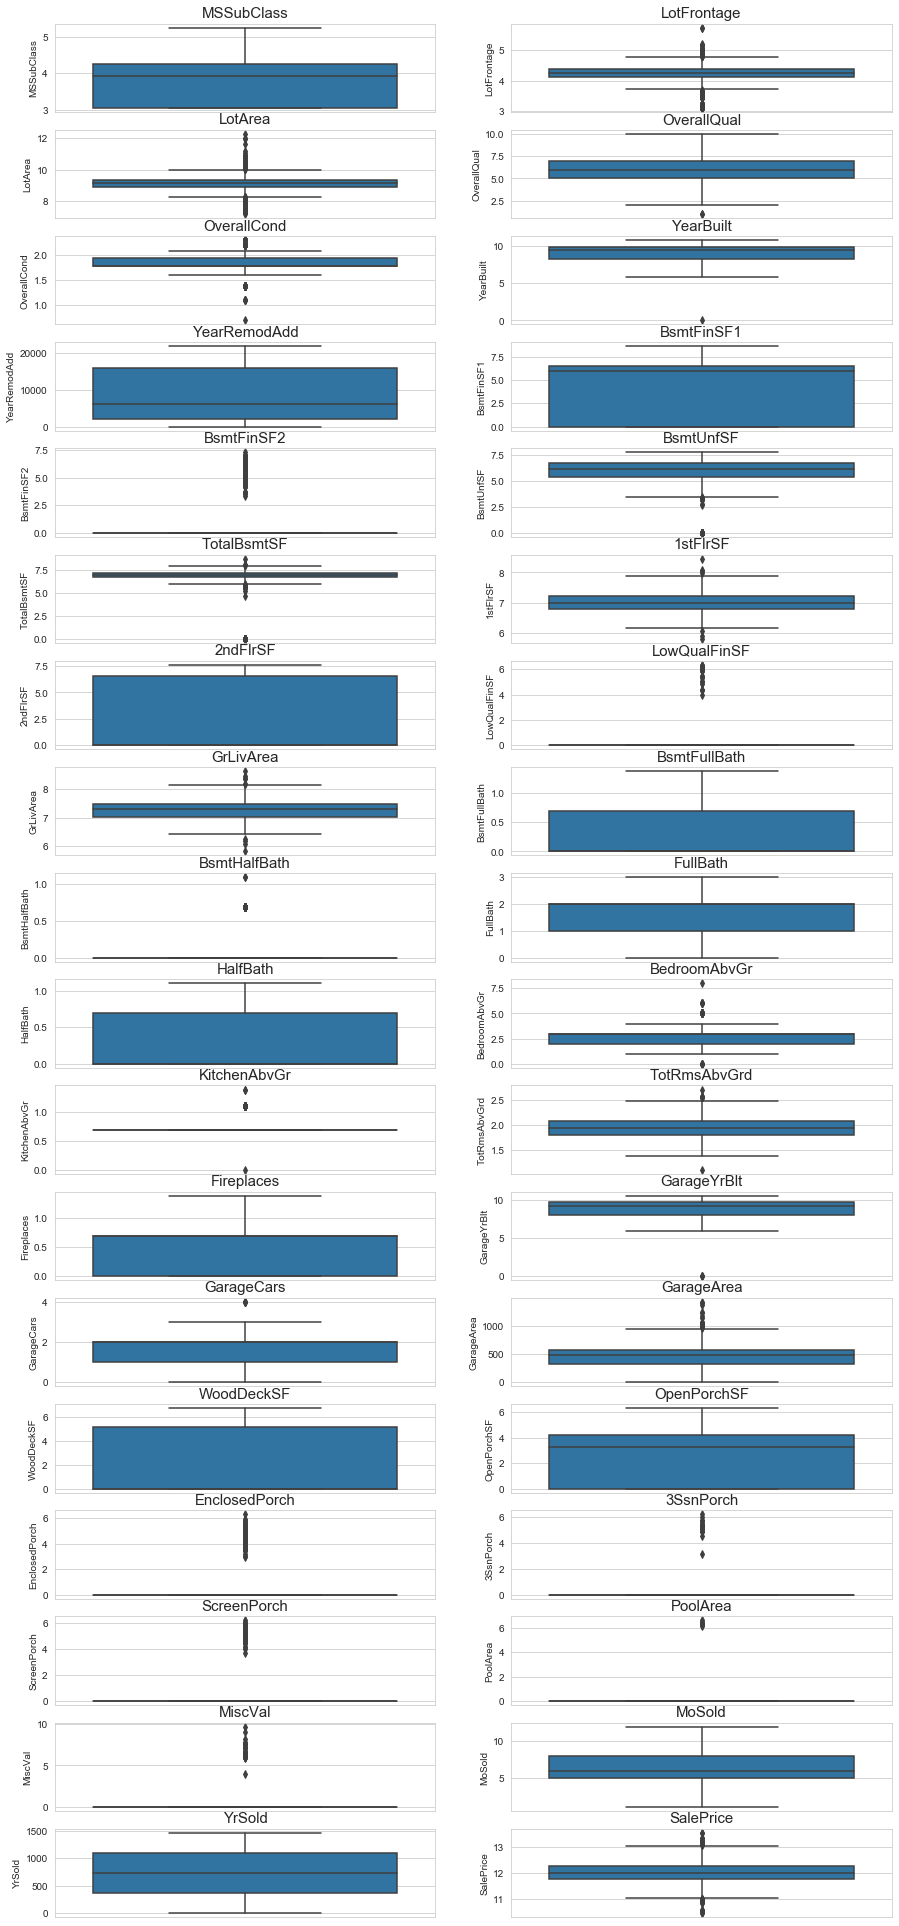

In [82]:
Check_Outliers()

# Observations

- Outliers are present in the most of the columns, such as `LotFrontage`, `LotArea`, `BsmtFinSF1`, `BsmtFinSF1` etc
- Outliers can be removed statistically
- Will Use IQR(Inter Quartile Range)


In [83]:
# Store the list of the columns in a list
col_list = ['LotArea', 'LotFrontage', 'BsmtFinSF1','BsmtFinSF2','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
          'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

#col_list = ['LotArea', 'BsmtFinSF1','BsmtFinSF2','TotalBsmtSF', '1stFlrSF', 'GrLivArea','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [84]:
# Remove Outliers based on IQR
# Since train data is limited, will use 99 perecentile as the upper limit
for col in col_list:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.99)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 

In [85]:
print(df.shape)

(1406, 73)


In [86]:
print('These Columns have only one Unique Value ..')
print("\n")
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)

These Columns have only one Unique Value ..


PoolArea
PoolQC


### Drop the following columns, as they have only one unique value and do not add any value to the prediction
- PoolArea
- PoolQc

In [87]:
# Remove the columns, that are having only one value
df = df.loc[:, df.nunique() != 1]
print(df.shape)

(1406, 71)


### Create Dummy Variables for Categorical Variables|

In [88]:
# create dummy variables for categorical variables

# subset all categorical variables
cat_var =  df.select_dtypes(include=['object'])
cat_var.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,No,GLQ,GasA,Ex,Y,Gd,Typ,None,Attchd,RFn,Y,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,Other,ALQ,GasA,Ex,Y,TA,Typ,TA,Attchd,RFn,Y,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,Other,GLQ,GasA,Ex,Y,Gd,Typ,TA,Attchd,RFn,Y,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,No,ALQ,GasA,Gd,Y,Gd,Typ,Gd,Detchd,Unf,Y,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,Av,GLQ,GasA,Ex,Y,Gd,Typ,TA,Attchd,RFn,Y,None,None,WD,Normal


In [89]:
# convert into dummies
cat_var_dummies = pd.get_dummies(cat_var, drop_first=True)
cat_var_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_TA,BsmtExposure_No,BsmtExposure_Other,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_None,FireplaceQu_Other,FireplaceQu_TA,GarageType_Detchd,GarageType_Other,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,

In [90]:
# drop categorical variables 
df = df.drop(list(cat_var.columns), axis=1)

In [91]:
# Concatenate dummy variables with Master DF
df = pd.concat([df, cat_var_dummies], axis = 1)

In [92]:
# Check the no of rows and columns
df.shape

(1406, 210)

### Split the data into Train and Test

In [93]:
# Split the dataset
df_train, df_test = train_test_split(df, train_size = 0.70, random_state = 100)

In [94]:
df_train.shape

(984, 210)

In [95]:
df_test.shape

(422, 210)

### Scale the Features

In [96]:
# scale 
col_to_norm = df_train.columns

scaler = StandardScaler()
df_train[col_to_norm] = scaler.fit_transform(df_train)

df_test[col_to_norm] = scaler.transform(df_test)

### Split the datasets into X and y

In [97]:
y_train = df_train.pop('SalePrice')
X_train = df_train


y_test = df_test.pop('SalePrice')
X_test = df_test

## 4. Model Building and Evaluation

## Ridge Regression


In [98]:
# Import the required libararies

from sklearn.metrics import mean_squared_error, r2_score

# create an instance of the class Ridge()
ridge1 = Ridge(alpha = 0.001)
ridge1.fit(X_train, y_train)

y_train_pred = ridge1.predict(X_train)
print('RMSE Train {}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('R2 Score Train {}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = ridge1.predict(X_test)
print('RMSE Test {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R2 Score Test {}'.format(r2_score(y_test, y_test_pred)))


RMSE Train 0.22371903247914418
R2 Score Train 0.9499497945065957
RMSE Test 0.32625876723299135
R2 Score Test 0.8879505598014878


### It is clearly evident that the alpha value(0.001), that was used, is not optimal, as there is a difference in Train(0.94) and Test R2(0.88) score. Thus, the model seems to be slightly overfitting.

### Model can be improved by selecting the optimal value of alpha(Hyperparameter) by Grid Search. Let's do that.

In [99]:
# grid search CV

# set up cross validation scheme
#folds = 5
folds = KFold(n_splits=10,shuffle=True,random_state=42)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# grid search
# Ridge model
model = Ridge()
model_cv = GridSearchCV(estimator = model
                        , param_grid = params 
                        , scoring= 'r2' 
                        , cv = folds 
                        , return_train_score=True
                        , verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [100]:
# Store the results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.0063,0.0006,0.0016,0.0005,0.0001,{'alpha': 0.0001},0.9003,0.8421,0.9226,0.9054,0.8643,0.9222,0.9060,0.8441,0.9357,0.9165,0.8959,0.0319,26,0.9524,0.9550,0.9502,0.9515,0.9550,0.9495,0.9507,0.9520,0.9492,0.9506,0.9516,0.0020
1,0.0057,0.0006,0.0012,0.0004,0.0010,{'alpha': 0.001},0.9003,0.8421,0.9226,0.9054,0.8643,0.9222,0.9060,0.8441,0.9357,0.9165,0.8959,0.0319,25,0.9524,0.9550,0.9502,0.9515,0.9550,0.9495,0.9507,0.9520,0.9492,0.9506,0.9516,0.0020
2,0.0072,0.0009,0.0018,0.0006,0.0100,{'alpha': 0.01},0.9003,0.8422,0.9226,0.9054,0.8643,0.9223,0.9060,0.8443,0.9357,0.9169,0.8960,0.0319,24,0.9524,0.9550,0.9502,0.9515,0.9550,0.9495,0.9507,0.9520,0.9492,0.9506,0.9516,0.0020
3,0.0075,0.0007,0.0016,0.0005,0.0500,{'alpha': 0.05},0.9003,0.8426,0.9226,0.9055,0.8643,0.9227,0.9059,0.8451,0.9358,0.9183,0.8963,0.0319,23,0.9524,0.9550,0.9502,0.9515,0.9550,0.9495,0.9507,0.9520,0.9492,0.9506,0.9516,0.0020
4,0.0077,0.0011,0.0016,0.0005,0.1000,{'alpha': 0.1},0.9003,0.8432,0.9226,0.9056,0.8643,0.9231,0.9057,0.8459,0.9359,0.9195,0.8966,0.0318,22,0.9524,0.9550,0.9502,0.9514,0.9550,0.9495,0.9507,0.9520,0.9492,0.9506,0.9516,0.0020


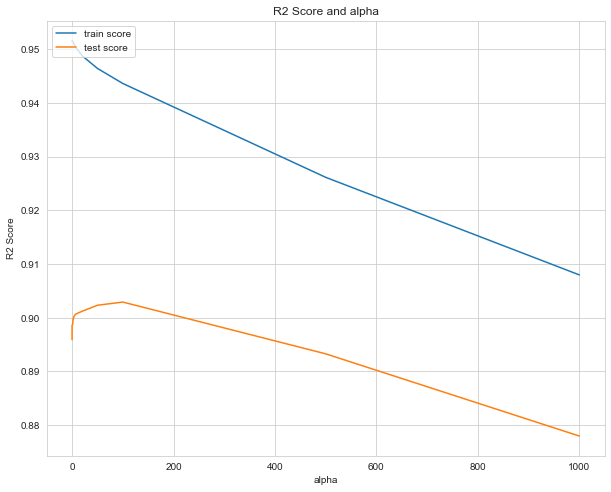

In [101]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

## Observation:

- It is evident that with low value of alpha the train R2 score is high, but the test R2 score is very low.
-  As the value of alpha increases, the train R2 score decreases gradually and test R2 score increases upto a certain point(100)
- It seems, the best score is at alpha ~ 100, after that the curve started dipping down constantly.


Let's check the optimal hyperparameter(alpha)

In [102]:
model_cv.best_score_

0.9029264470125055

In [103]:
model_cv.best_params_

{'alpha': 100}

##  Performance
### Create the final Ridge model on the basis of the above graph and best score

In [104]:
ridge2 = Ridge(alpha = 100)
ridge2.fit(X_train, y_train)
y_train_pred = ridge2.predict(X_train)
print('R2 Score Train {}'.format(r2_score(y_train, y_train_pred)))

ridge2.fit(X_test, y_test)
y_train_pred = ridge2.predict(X_test)
print('R2 Score Test {}'.format(r2_score(y_test, y_test_pred)))


R2 Score Train 0.9426540042214252
R2 Score Test 0.8879505598014878


## Observation
- As per the best model(alpha = 100):
    - Train R2 score is 0.94265
    - Test R2 Score is  0.88795

In [105]:
ridge2.coef_

array([-6.54035669e-03,  2.11554148e-02,  7.57325914e-02,  1.15463280e-01,
        9.71601588e-02, -5.03398386e-02, -5.66962713e-02,  3.47022137e-02,
        1.01755482e-02, -1.43576717e-02,  8.45147004e-02,  1.00284950e-01,
        2.50134339e-02, -8.16853527e-03,  1.28485449e-01,  3.95192378e-02,
       -1.19077896e-02,  5.11435946e-02,  4.04314179e-02,  1.52103023e-03,
       -3.34226509e-02,  5.19159604e-02,  3.74403792e-02, -2.50831823e-02,
        4.79438400e-02,  6.34896142e-02, -2.76822442e-03,  3.57174373e-02,
       -1.39180072e-02,  7.69709028e-03,  3.08475446e-02,  3.20085881e-03,
        1.07419953e-03,  1.19831399e-02,  1.05367763e-02,  9.05349444e-03,
        2.49830344e-02, -2.15953828e-03,  1.76327115e-02, -8.90754165e-03,
       -9.92495818e-03,  9.13675260e-03,  1.82880335e-02, -8.44626473e-03,
        3.20641700e-03, -5.81228809e-03,  1.97148179e-03, -5.59558915e-03,
        1.99391295e-02, -2.02333063e-02, -1.50894294e-02, -5.75850508e-03,
       -2.26792347e-03,  

### List the top 10 features 

In [106]:
model_feature = list(ridge2.coef_)
model_feature.insert(0,ridge2.intercept_)
cols = df.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_feature)))
ridge_coef.columns = ['Feaure','Coef']

In [107]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
15,BsmtFullBath,0.1285
4,OverallCond,0.1155
12,2ndFlrSF,0.1003
5,YearBuilt,0.0972
11,1stFlrSF,0.0845
3,OverallQual,0.0757
26,WoodDeckSF,0.0635
70,Neighborhood_NridgHt,0.0538
22,Fireplaces,0.0519
18,HalfBath,0.0511


## Double the value of alpha for Ridge Regression, that is from 100 to 200 and observe the impact

In [108]:
ridge2 = Ridge(alpha = 200)
ridge2.fit(X_train, y_train)
y_train_pred = ridge2.predict(X_train)
print('R2 Score Train {}'.format(r2_score(y_train, y_train_pred)))

ridge2.fit(X_test, y_test)
y_train_pred = ridge2.predict(X_test)
print('R2 Score Test {}'.format(r2_score(y_test, y_test_pred)))


R2 Score Train 0.9383117959349454
R2 Score Test 0.8879505598014878


#### Check the top 10 Features and their coefficients

In [109]:
model_feature = list(ridge2.coef_)
model_feature.insert(0,ridge2.intercept_)
cols = df.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_feature)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
15,BsmtFullBath,0.1065
4,OverallCond,0.1031
12,2ndFlrSF,0.0869
5,YearBuilt,0.0767
11,1stFlrSF,0.0734
3,OverallQual,0.0626
26,WoodDeckSF,0.0590
22,Fireplaces,0.0556
70,Neighborhood_NridgHt,0.0508
25,GarageArea,0.0496


## Observation
- After doubling the alplha to 200:
    - Train R2 score decreased to  0.9383 from 0.94265
    - Test R2 Score remains the same.
    - There is a reduction in the coefficient of the features.

## Lasso Regression


In [110]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Num of Non-Zero Coeff {}'.format(np.sum(lasso.coef_ != 0)))
print('Train R2 score {}' .format(r2_score(y_true=y_train,y_pred=y_train_pred)))
print('Test  R2 score {}' .format(r2_score(y_true=y_test,y_pred=y_test_pred)))

Num of Non-Zero Coeff 177
Train R2 score 0.9483409672808287
Test  R2 score 0.893883551200276


### With alpha = 0.001, there a diffrence in Train and Test Score. Let's try to tune the hyperparameter

In [111]:
# grid search CV

folds = 5

# specify range of hyperparameters
params =  {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
# grid search
# Lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model
                        , param_grid = params 
                        , scoring= 'r2' 
                        , cv = folds 
                        , return_train_score=True
                        , verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [112]:
# Store the results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0425,0.0120,0.0014,0.0005,0.0010,{'alpha': 0.001},0.9235,0.9061,0.9013,0.8842,0.9001,0.9030,0.0126,2,0.9488,0.9516,0.9533,0.9541,0.9530,0.9522,0.0019
1,0.0132,0.0049,0.0016,0.0005,0.0100,{'alpha': 0.01},0.9285,0.9093,0.9134,0.8932,0.9145,0.9118,0.0113,1,0.9323,0.9375,0.9365,0.9377,0.9363,0.9361,0.0020
2,0.0072,0.0004,0.0012,0.0004,0.1000,{'alpha': 0.1},0.8794,0.8623,0.8456,0.8086,0.8517,0.8495,0.0235,3,0.8514,0.8531,0.8542,0.8614,0.8578,0.8556,0.0036
3,0.0056,0.0005,0.0012,0.0004,1.0000,{'alpha': 1.0},-0.0005,-0.0009,-0.0010,-0.0005,-0.0000,-0.0006,0.0004,4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0058,0.0007,0.0014,0.0005,5.0000,{'alpha': 5.0},-0.0005,-0.0009,-0.0010,-0.0005,-0.0000,-0.0006,0.0004,4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


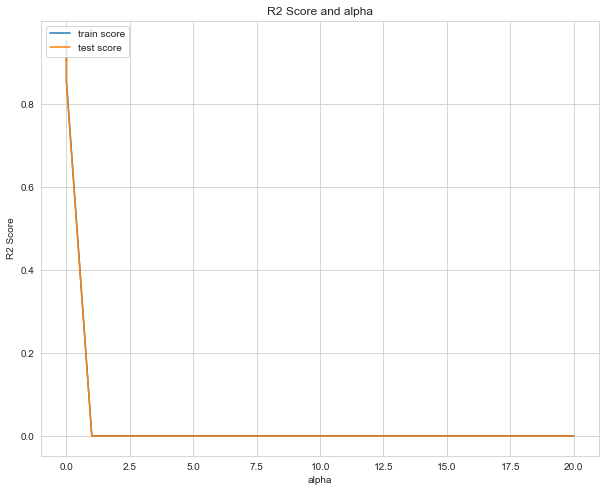

In [113]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize = (10, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [114]:
model_cv.best_score_

0.911766611149985

In [115]:
model_cv.best_params_

{'alpha': 0.01}

## Performance 
### Create Final Lasso Model on the basis of above graph and score

In [116]:

lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Num of Non-Zero Coeff {}'.format(np.sum(lasso.coef_ != 0)))
print('Train R2 score {}' .format(r2_score(y_true=y_train,y_pred=y_train_pred)))
print('Test  R2 score {}' .format(r2_score(y_true=y_test,y_pred=y_test_pred)))

Num of Non-Zero Coeff 86
Train R2 score 0.9327567547341632
Test  R2 score 0.8918494026764401


## Observation
- As per the best model(alpha = 0.01):
    - No of Non-Zero coefficients has been redeuced t0 86
    - Train R2 score is 0.9327
    - Test R2 Score is 0.8918

In [117]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

### List the top 10 features 

In [118]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
15,BsmtFullBath,0.3085
4,OverallCond,0.2149
11,1stFlrSF,0.1151
3,OverallQual,0.1106
5,YearBuilt,0.1059
8,BsmtFinSF2,0.0660
202,SaleType_Oth,0.0518
25,GarageArea,0.0498
208,SaleCondition_Partial,0.0469
26,WoodDeckSF,0.0441


## Double the value of alpha for Lasso Regression, that is from 0.01 to 0.02 and observe the impact

In [119]:

lasso = Lasso(alpha=0.02)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Num of Non-Zero Coeff {}'.format(np.sum(lasso.coef_ != 0)))
print('Train R2 score {}' .format(r2_score(y_true=y_train,y_pred=y_train_pred)))
print('Test  R2 score {}' .format(r2_score(y_true=y_test,y_pred=y_test_pred)))

Num of Non-Zero Coeff 49
Train R2 score 0.9224797197154642
Test  R2 score 0.8845475235394347


### Check the top 10 features and their coefficients

In [120]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
15,BsmtFullBath,0.3148
4,OverallCond,0.2384
11,1stFlrSF,0.1208
3,OverallQual,0.1080
5,YearBuilt,0.0939
8,BsmtFinSF2,0.0645
25,GarageArea,0.0515
26,WoodDeckSF,0.0477
170,KitchenQual_Fa,0.0412
23,GarageYrBlt,0.0388


## Observation
- After doubling the alplha to 0.02:
    - Train R2 score decreased to  0.9224 from 0.9327
    - Test R2 Score decreased to 0.8845 from 0.8918.
    - The no of coefficeint reduced to 49 from 86.
    - There is change in the coefficient value  of the features.

### Build Lasso Model by excluding top 5 features

In [121]:
# Store the list of the columns to be exluded in a list
cols_to_be_excluded = ['BsmtFullBath', 'OverallCond', '1stFlrSF', 'OverallQual', 'YearBuilt'] 

# Store the list of the all columns, apart from the excluded columns in a list
New_Col_List = [ x for x in X_train.columns if x not in cols_to_be_excluded ]

In [122]:
# Create a new X_train_red dataframe with the reduced columns
X_train_red = X_train[New_Col_List]

# Create a new X_test_red dataframe with the reduced columns
X_test_red = X_test[New_Col_List]

In [123]:
# Display the rows and columns of train dataset
X_train_red.shape

(984, 204)

In [124]:
# Display the rows and columns of test dataset
X_test_red.shape

(422, 204)

### Get the best alpha value

In [125]:
# grid search CV

folds = 5

# specify range of hyperparameters
params =  {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
# grid search
# Lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model
                        , param_grid = params 
                        , scoring= 'r2' 
                        , cv = folds 
                        , return_train_score=True
                        , verbose = 1)            
model_cv.fit(X_train_red, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [126]:
# Store the results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0421,0.0092,0.0020,0.0000,0.0010,{'alpha': 0.001},0.8999,0.8831,0.8787,0.8478,0.8928,0.8805,0.0180,2,0.9384,0.9413,0.9431,0.9457,0.9403,0.9418,0.0025
1,0.0100,0.0006,0.0014,0.0005,0.0100,{'alpha': 0.01},0.9024,0.8843,0.8948,0.8569,0.8959,0.8869,0.0161,1,0.9165,0.9237,0.9223,0.9261,0.9206,0.9218,0.0032
2,0.0074,0.0005,0.0014,0.0005,0.1000,{'alpha': 0.1},0.8316,0.8352,0.8219,0.7775,0.8171,0.8167,0.0206,3,0.8217,0.8233,0.8241,0.8369,0.8285,0.8269,0.0055
3,0.0056,0.0005,0.0010,0.0000,1.0000,{'alpha': 1.0},-0.0005,-0.0009,-0.0010,-0.0005,-0.0000,-0.0006,0.0004,4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0054,0.0005,0.0012,0.0004,5.0000,{'alpha': 5.0},-0.0005,-0.0009,-0.0010,-0.0005,-0.0000,-0.0006,0.0004,4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


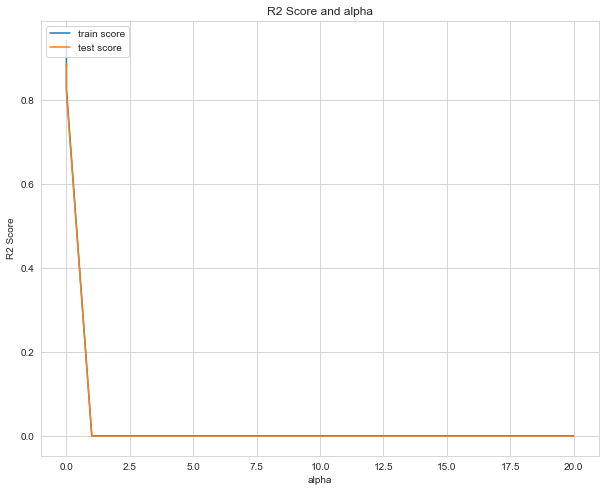

In [127]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize = (10, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [128]:
model_cv.best_score_

0.8868508354009036

In [129]:
model_cv.best_params_

{'alpha': 0.01}

In [130]:
lasso_red = Lasso(alpha=0.01)
lasso_red.fit(X_train_red,y_train)

y_train_pred = lasso_red.predict(X_train_red)
y_test_pred = lasso_red.predict(X_test_red)

print('Num of Non-Zero Coeff {}'.format(np.sum(lasso_red.coef_ != 0)))
print('Train R2 score {}' .format(r2_score(y_true=y_train,y_pred=y_train_pred)))
print('Test  R2 score {}' .format(r2_score(y_true=y_test,y_pred=y_test_pred)))

Num of Non-Zero Coeff 91
Train R2 score 0.9180275442115089
Test  R2 score 0.8723015105051563


In [131]:
### Check the top 10 features na their coefficients
model_param = list(lasso_red.coef_)
model_param.insert(0,lasso_red.intercept_)
cols = X_train_red.columns
cols.insert(0,'const')
lasso_red_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_red_coef.columns = ['Featuere','Coef']
lasso_red_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
11,BsmtHalfBath,0.3602
8,2ndFlrSF,0.1331
3,YearRemodAdd,0.0830
197,SaleType_Oth,0.0674
20,GarageArea,0.0658
165,KitchenQual_Fa,0.0648
174,FireplaceQu_None,0.0590
203,SaleCondition_Partial,0.0569
18,GarageYrBlt,0.0567
5,BsmtFinSF2,0.0563


### Observation
- The five most important features after excluding the original features from the list are :
    - `BsmtHalfBath`
    - `2ndFlrSF`
    - `YearRemodAdd`
    - `SaleType_Oth`
    - `GarageArea`

### Choosing Best Model Among Ridge and Lasso

It is observed that the r2_scores are almost same for both Ridge and Lasso Regression models. But as lasso penalizes more on the dataset and can also help in feature elemination(as evident that no of non-zero fetures reduced to 86), it is best to go with Lasso as a final model

## Final Model

In [132]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('Train R2 Score {}' .format(r2_score(y_true=y_train,y_pred=y_train_pred)))
print('Train R2 Score {}' .format(r2_score(y_true=y_test,y_pred=y_test_pred)))

Train R2 Score 0.9327567547341632
Train R2 Score 0.8918494026764401


## Best Features

### After comparing both the models, the following are the features that best explain the Housing datasets:
- `BsmtFullBath` :- Basement full bathrooms
- `OverallCond`  :- Rates the overall condition of the house
- `1stFlrSF`     :- First Floor square feet
- `OverallQual`  :- Rates the overall material and finish of the house
- `YearBuilt`    :- Original construction date

## Recommendations

- The company should buy houses, that have full bathrooms on the basement. Houses with full basement bathrooms fetch more price. 
- The company must the check the overall condition of the houses before buying them, as they add great value to the price of a house.
- The company needs to make sure the are of the first floor is relatively big, as it is one of the most important requirements among others.
- The company should check the overall material and finishing of the houses. It is observed that houses with good to excellent condition
  and finishing fetch more prices than the ones with poor or average rating.
- The age of the house is also an important factor. Newer the house, higher is the selling price.